In [43]:
import yfinance as yf
import pandas_ta as ta
import pandas as pd

btc = yf.Ticker("BTC-USD")
btc = btc.history(period="max", interval="1d")

In [58]:
def SmaCross(df, smaCurta=5, smaLonga=20):
    df = df.iloc[(smaCurta+smaLonga)*-1:]
    dfsmaCurta = ta.sma(df['Close'], length=smaCurta)
    dfsmaLonga = ta.sma(df['Close'], length=smaLonga)
    df = pd.concat([df, dfsmaCurta, dfsmaLonga], axis=1)
    print(f'SMA_{smaCurta}')
    print(f'SMA_{smaLonga}')
    df.rename(columns={f'SMA_{smaCurta}': 'smaCurta',
              f'SMA_{smaLonga}': 'smaLonga'}, inplace=True)
    df.assign(sma_cross=('buy' if df[smaCurta] > df[smaLonga] else 'sell'))
    return df


result = SmaCross(btc, smaCurta=5, smaLonga=10)
result


SMA_5
SMA_10


KeyError: 'SMA_{smaCurta}'

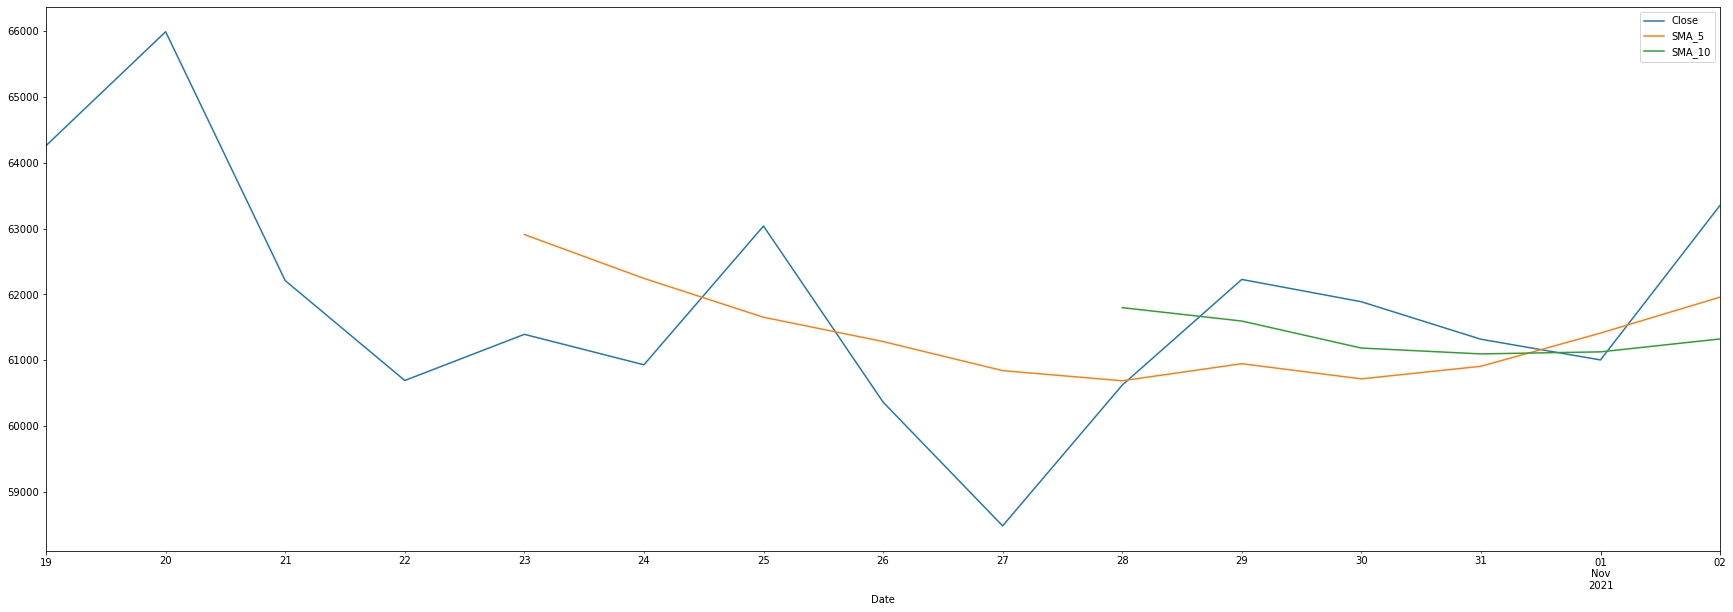

In [47]:
result.plot(y=['Close', 'SMA_5', 'SMA_10'], figsize=(30, 10))
